In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
FIG_DIR = os.path.join(PROJECT_ROOT, "figures")
REPORT_DIR = os.path.join(PROJECT_ROOT, "reports")
MODEL_DIR = os.path.join(PROJECT_ROOT, "models")
os.makedirs(FIG_DIR, exist_ok=True)

# Load SHAP importance file (Random Forest)
rf_importance = pd.read_csv(os.path.join(REPORT_DIR, "random forest_shap_importance.csv"))

# If you have XGB shap importance later, load it too
xgb_importance_path = os.path.join(REPORT_DIR, "xgb_shap_importance.csv")
xgb_importance = pd.read_csv(xgb_importance_path) if os.path.exists(xgb_importance_path) else None

In [3]:
# Model comparison summary (from earlier notebook outputs)
data = {
    "Model": ["Random Forest", "XGBoost"],
    "Accuracy": [0.746, 0.740],
    "Precision (macro)": [0.69, 0.67],
    "Recall (macro)": [0.69, 0.66],
    "F1 (macro)": [0.69, 0.67],
}

metrics_df = pd.DataFrame(data)
metrics_df

,Model,Accuracy,Precision (macro),Recall (macro),F1 (macro)
0,Random Forest,0.746,0.69,0.69,0.69
1,XGBoost,0.740,0.67,0.66,0.67


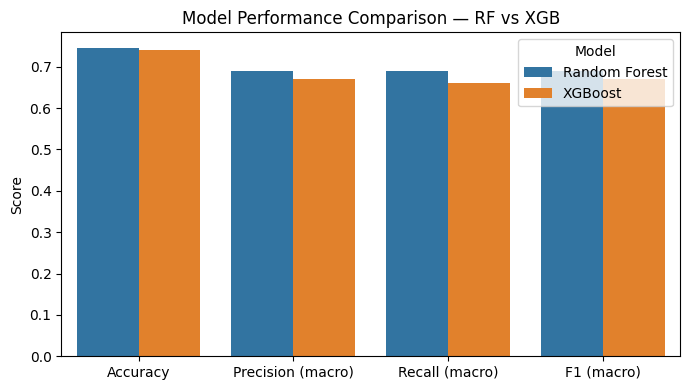

In [4]:
plt.figure(figsize=(7,4))
sns.barplot(data=metrics_df.melt(id_vars="Model"), x="variable", y="value", hue="Model")
plt.title("Model Performance Comparison — RF vs XGB")
plt.ylabel("Score")
plt.xlabel("")
plt.legend(title="Model")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "model_comparison.png"), dpi=150)
plt.show()

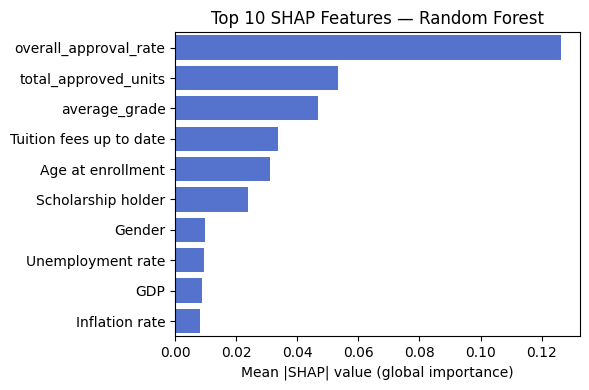

In [5]:
top_rf = rf_importance.head(10)
plt.figure(figsize=(6,4))
sns.barplot(data=top_rf, x="mean_abs_shap", y="feature", color="royalblue")
plt.title("Top 10 SHAP Features — Random Forest")
plt.xlabel("Mean |SHAP| value (global importance)")
plt.ylabel("")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "rf_top_shap_features.png"), dpi=150)
plt.show()

In [6]:
if xgb_importance is not None:
    top_xgb = xgb_importance.head(10)
    plt.figure(figsize=(6,4))
    sns.barplot(data=top_xgb, x="mean_abs_shap", y="feature", color="orange")
    plt.title("Top 10 SHAP Features — XGBoost")
    plt.xlabel("Mean |SHAP| value (global importance)")
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, "xgb_top_shap_features.png"), dpi=150)
    plt.show()

In [7]:
# Example merge if feature_importance file exists
feat_imp_path = os.path.join(REPORT_DIR, "rf_feature_importance.csv")
if os.path.exists(feat_imp_path):
    feat_imp = pd.read_csv(feat_imp_path)
    merged = pd.merge(rf_importance, feat_imp, on="feature", suffixes=("_shap", "_rf"))
    
    plt.figure(figsize=(5,5))
    sns.scatterplot(data=merged, x="importance_rf", y="mean_abs_shap")
    plt.title("Feature Importance vs SHAP Importance (RF)")
    plt.xlabel("Model Feature Importance (RF)")
    plt.ylabel("Mean |SHAP| Value")
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, "rf_shap_vs_importance.png"), dpi=150)
    plt.show()

In [8]:
summary_text = f"""
# Final Results Summary

**Random Forest**
- Accuracy: 0.746
- F1 (macro): 0.69

**XGBoost**
- Accuracy: 0.740
- F1 (macro): 0.67

Top Predictors (SHAP):
1. Average Grade
2. Overall Approval Rate
3. Total Approved Units
4. Tuition Fees Up to Date
5. Age at Enrollment

**Interpretation:** Academic performance and tuition compliance dominate student outcome prediction.
"""

report_path = os.path.join(REPORT_DIR, "final_summary.md")
with open(report_path, "w") as f:
    f.write(summary_text.strip())

print("Saved:", report_path)

Saved: /home/glinux/Projects/Skole/AnvendtData/reports/final_summary.md
